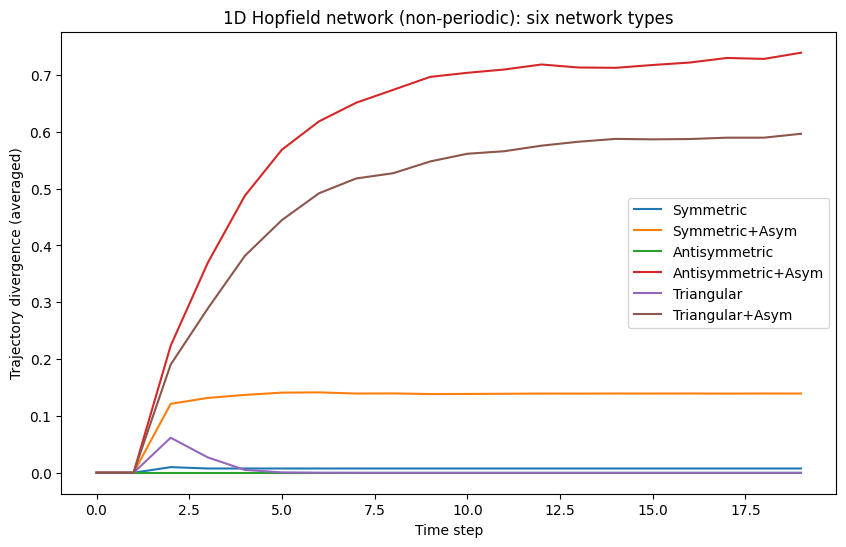

In [109]:
#non-periodic sing
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# Helper functions
# ----------------------------
def run_hopfield_1D(W, excite_order, T):
    N = W.shape[0]
    s = np.zeros(N, dtype=float)
    traj = np.zeros((T, N), dtype=float)
    for t in range(T):
        for idx, excite_time in excite_order:
            if t == excite_time:
                s[idx] = 1.0
        s = sign(W @ s)
        traj[t] = s
    return traj

def trajectory_divergence(traj1, traj2):
    return np.mean(np.abs(traj1 - traj2), axis=1)

# ----------------------------
# Parameters
# ----------------------------
N = 25          # 1D chain length
T = 20
p = 3
num_realizations = 1000
asym_strength = 0.05

# ----------------------------
# Middle neurons
# ----------------------------
neuron_A = N//2
neuron_B = N//2 + 1
order1 = [(neuron_A, 1), (neuron_B, 2)]
order2 = [(neuron_B, 1), (neuron_A, 2)]

# ----------------------------
# Containers for divergence
# ----------------------------
divergences = {name: np.zeros(T) for name in [
    'Symmetric', 'Symmetric+Asym',
    'Antisymmetric', 'Antisymmetric+Asym',
    'Triangular', 'Triangular+Asym'
]}

# ----------------------------
# Realizations loop
# ----------------------------
for realization in range(num_realizations):
    # Generate random patterns
    patterns = np.random.choice([-1,1], size=(p, N))
    
    # Base matrices
    W_sym = sum(np.outer(p, p) for p in patterns)/N
    W_antisym = W_sym - W_sym.T
    W_tri = np.triu(sum(np.outer(p, p) for p in patterns)/N, k=1)
    
    # ----------------------------
    # Unstructured random asymmetry
    # ----------------------------
    rand_asym = np.random.randn(N,N) * asym_strength
    W_sym_asym = W_sym + rand_asym
    W_antisym_asym = W_antisym + rand_asym
    W_tri_asym = W_tri + rand_asym
    np.fill_diagonal(W_sym_asym, 0)
    np.fill_diagonal(W_antisym_asym, 0)
    np.fill_diagonal(W_tri_asym, 0)
    
    # ----------------------------
    # Networks dictionary
    # ----------------------------
    networks = {
        'Symmetric': W_sym,
        'Symmetric+Asym': W_sym_asym,
        'Antisymmetric': W_antisym,
        'Antisymmetric+Asym': W_antisym_asym,
        'Triangular': W_tri,
        'Triangular+Asym': W_tri_asym
    }
    
    # Run each network
    for name, W in networks.items():
        traj1 = run_hopfield_1D(W, order1, T)
        traj2 = run_hopfield_1D(W, order2, T)
        divergences[name] += trajectory_divergence(traj1, traj2)

# ----------------------------
# Average over realizations
# ----------------------------
for name in divergences:
    divergences[name] /= num_realizations

# ----------------------------
# Plot
# ----------------------------
plt.figure(figsize=(10,6))
for name, D in divergences.items():
    plt.plot(D, label=name)
plt.xlabel("Time step")
plt.ylabel("Trajectory divergence (averaged)")
plt.title("1D Hopfield network (non-periodic): six network types")
plt.legend()
plt.show()

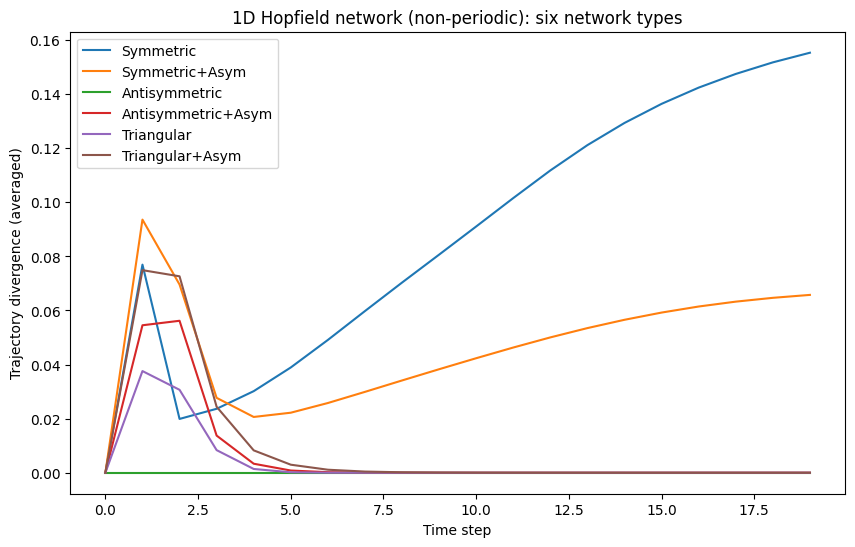

In [108]:
#non-periodic tanh
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# Helper functions
# ----------------------------
def run_hopfield_1D(W, excite_order, T):
    N = W.shape[0]
    s = np.zeros(N, dtype=float)
    traj = np.zeros((T, N), dtype=float)
    for t in range(T):
        for idx, excite_time in excite_order:
            if t == excite_time:
                s[idx] = 1.0
        s = np.tanh(W @ s)
        traj[t] = s
    return traj

def trajectory_divergence(traj1, traj2):
    return np.mean(np.abs(traj1 - traj2), axis=1)

# ----------------------------
# Parameters
# ----------------------------
N = 25          # 1D chain length
T = 20
p = 3
num_realizations = 1000
asym_strength = 0.05

# ----------------------------
# Middle neurons
# ----------------------------
neuron_A = N//2
neuron_B = N//2 + 1
order1 = [(neuron_A, 1), (neuron_B, 2)]
order2 = [(neuron_B, 1), (neuron_A, 2)]

# ----------------------------
# Containers for divergence
# ----------------------------
divergences = {name: np.zeros(T) for name in [
    'Symmetric', 'Symmetric+Asym',
    'Antisymmetric', 'Antisymmetric+Asym',
    'Triangular', 'Triangular+Asym'
]}

# ----------------------------
# Realizations loop
# ----------------------------
for realization in range(num_realizations):
    # Generate random patterns
    patterns = np.random.choice([-1,1], size=(p, N))
    
    # Base matrices
    W_sym = sum(np.outer(p, p) for p in patterns)/N
    W_antisym = W_sym - W_sym.T
    W_tri = np.triu(sum(np.outer(p, p) for p in patterns)/N, k=1)
    
    # ----------------------------
    # Unstructured random asymmetry
    # ----------------------------
    rand_asym = np.random.randn(N,N) * asym_strength
    W_sym_asym = W_sym + rand_asym
    W_antisym_asym = W_antisym + rand_asym
    W_tri_asym = W_tri + rand_asym
    np.fill_diagonal(W_sym_asym, 0)
    np.fill_diagonal(W_antisym_asym, 0)
    np.fill_diagonal(W_tri_asym, 0)
    
    # ----------------------------
    # Networks dictionary
    # ----------------------------
    networks = {
        'Symmetric': W_sym,
        'Symmetric+Asym': W_sym_asym,
        'Antisymmetric': W_antisym,
        'Antisymmetric+Asym': W_antisym_asym,
        'Triangular': W_tri,
        'Triangular+Asym': W_tri_asym
    }
    
    # Run each network
    for name, W in networks.items():
        traj1 = run_hopfield_1D(W, order1, T)
        traj2 = run_hopfield_1D(W, order2, T)
        divergences[name] += trajectory_divergence(traj1, traj2)

# ----------------------------
# Average over realizations
# ----------------------------
for name in divergences:
    divergences[name] /= num_realizations

# ----------------------------
# Plot
# ----------------------------
plt.figure(figsize=(10,6))
for name, D in divergences.items():
    plt.plot(D, label=name)
plt.xlabel("Time step")
plt.ylabel("Trajectory divergence (averaged)")
plt.title("1D Hopfield network (non-periodic): six network types")
plt.legend()
plt.show()


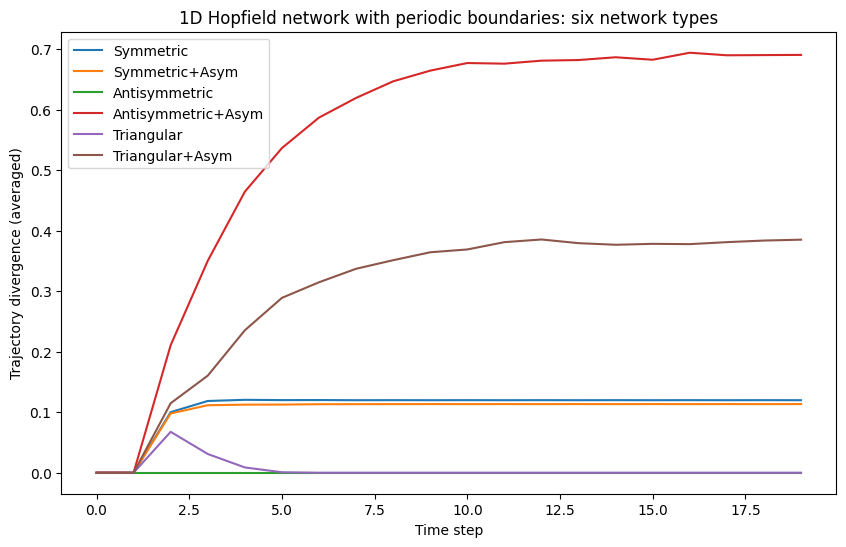

In [106]:
#Pediodic sign
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# Helper functions
# ----------------------------
def run_hopfield_1D(W, excite_order, T):
    N = W.shape[0]
    s = np.zeros(N, dtype=float)
    traj = np.zeros((T, N), dtype=float)
    for t in range(T):
        for idx, excite_time in excite_order:
            if t == excite_time:
                s[idx] = 1.0
        s = sign(W @ s)
        traj[t] = s
    return traj

def trajectory_divergence(traj1, traj2):
    return np.mean(np.abs(traj1 - traj2), axis=1)

def add_periodic_1D(W, N):
    """Wrap 1D connections for periodic boundary"""
    W_periodic = W.copy()
    for i in range(N):
        right = (i+1)%N
        left = (i-1)%N
        W_periodic[i, right] = W[i, right]
        W_periodic[i, left] = W[i, left]
    np.fill_diagonal(W_periodic, 0)
    return W_periodic

# ----------------------------
# Parameters
# ----------------------------
N = 25          # 1D chain length
T = 20
p = 3
num_realizations = 1000
asym_strength = 0.01

# ----------------------------
# Middle neurons
# ----------------------------
neuron_A = N//2
neuron_B = N//2 + 1
order1 = [(neuron_A, 1), (neuron_B, 2)]
order2 = [(neuron_B, 1), (neuron_A, 2)]

# ----------------------------
# Containers for divergence
# ----------------------------
divergences = {name: np.zeros(T) for name in [
    'Symmetric', 'Symmetric+Asym',
    'Antisymmetric', 'Antisymmetric+Asym',
    'Triangular', 'Triangular+Asym'
]}

# ----------------------------
# Realizations loop
# ----------------------------
for realization in range(num_realizations):
    # Generate random patterns
    patterns = np.random.choice([-1,1], size=(p, N))
    
    # Base matrices
    W_sym = sum(np.outer(p, p) for p in patterns)/N
    W_antisym = W_sym - W_sym.T
    W_tri = np.triu(sum(np.outer(p, p) for p in patterns)/N, k=1)
    
    # Add 1D periodic connections
    W_sym = add_periodic_1D(W_sym, N)
    W_antisym = add_periodic_1D(W_antisym, N)
    W_tri = add_periodic_1D(W_tri, N)
    
    # Add unstructured asymmetry
    rand_asym = np.random.randn(N,N) * asym_strength
    W_sym_asym = W_sym + rand_asym
    W_antisym_asym = W_antisym + rand_asym
    W_tri_asym = W_tri + rand_asym
    np.fill_diagonal(W_sym_asym, 0)
    np.fill_diagonal(W_antisym_asym, 0)
    np.fill_diagonal(W_tri_asym, 0)
    
    # Networks dictionary
    networks = {
        'Symmetric': W_sym,
        'Symmetric+Asym': W_sym_asym,
        'Antisymmetric': W_antisym,
        'Antisymmetric+Asym': W_antisym_asym,
        'Triangular': W_tri,
        'Triangular+Asym': W_tri_asym
    }
    
    # Run each network
    for name, W in networks.items():
        traj1 = run_hopfield_1D(W, order1, T)
        traj2 = run_hopfield_1D(W, order2, T)
        divergences[name] += trajectory_divergence(traj1, traj2)

# ----------------------------
# Average over realizations
# ----------------------------
for name in divergences:
    divergences[name] /= num_realizations

# ----------------------------
# Plot
# ----------------------------
plt.figure(figsize=(10,6))
for name, D in divergences.items():
    plt.plot(D, label=name)
plt.xlabel("Time step")
plt.ylabel("Trajectory divergence (averaged)")
plt.title("1D Hopfield network with periodic boundaries: six network types")
plt.legend()
plt.show()


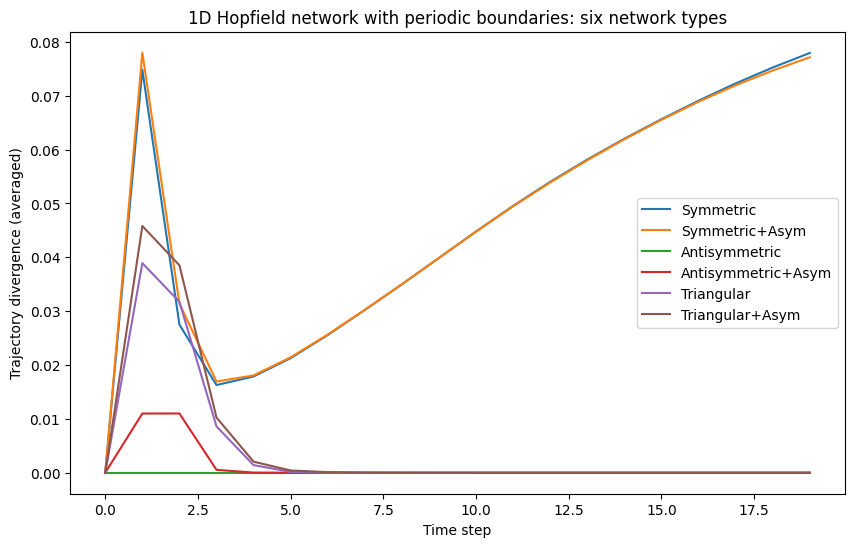

In [107]:
#Pediodic tanh
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# Helper functions
# ----------------------------
def run_hopfield_1D(W, excite_order, T):
    N = W.shape[0]
    s = np.zeros(N, dtype=float)
    traj = np.zeros((T, N), dtype=float)
    for t in range(T):
        for idx, excite_time in excite_order:
            if t == excite_time:
                s[idx] = 1.0
        s = np.tanh(W @ s)
        traj[t] = s
    return traj

def trajectory_divergence(traj1, traj2):
    return np.mean(np.abs(traj1 - traj2), axis=1)

def add_periodic_1D(W, N):
    """Wrap 1D connections for periodic boundary"""
    W_periodic = W.copy()
    for i in range(N):
        right = (i+1)%N
        left = (i-1)%N
        W_periodic[i, right] = W[i, right]
        W_periodic[i, left] = W[i, left]
    np.fill_diagonal(W_periodic, 0)
    return W_periodic

# ----------------------------
# Parameters
# ----------------------------
N = 25          # 1D chain length
T = 20
p = 3
num_realizations = 1000
asym_strength = 0.01

# ----------------------------
# Middle neurons
# ----------------------------
neuron_A = N//2
neuron_B = N//2 + 1
order1 = [(neuron_A, 1), (neuron_B, 2)]
order2 = [(neuron_B, 1), (neuron_A, 2)]

# ----------------------------
# Containers for divergence
# ----------------------------
divergences = {name: np.zeros(T) for name in [
    'Symmetric', 'Symmetric+Asym',
    'Antisymmetric', 'Antisymmetric+Asym',
    'Triangular', 'Triangular+Asym'
]}

# ----------------------------
# Realizations loop
# ----------------------------
for realization in range(num_realizations):
    # Generate random patterns
    patterns = np.random.choice([-1,1], size=(p, N))
    
    # Base matrices
    W_sym = sum(np.outer(p, p) for p in patterns)/N
    W_antisym = W_sym - W_sym.T
    W_tri = np.triu(sum(np.outer(p, p) for p in patterns)/N, k=1)
    
    # Add 1D periodic connections
    W_sym = add_periodic_1D(W_sym, N)
    W_antisym = add_periodic_1D(W_antisym, N)
    W_tri = add_periodic_1D(W_tri, N)
    
    # Add unstructured asymmetry
    rand_asym = np.random.randn(N,N) * asym_strength
    W_sym_asym = W_sym + rand_asym
    W_antisym_asym = W_antisym + rand_asym
    W_tri_asym = W_tri + rand_asym
    np.fill_diagonal(W_sym_asym, 0)
    np.fill_diagonal(W_antisym_asym, 0)
    np.fill_diagonal(W_tri_asym, 0)
    
    # Networks dictionary
    networks = {
        'Symmetric': W_sym,
        'Symmetric+Asym': W_sym_asym,
        'Antisymmetric': W_antisym,
        'Antisymmetric+Asym': W_antisym_asym,
        'Triangular': W_tri,
        'Triangular+Asym': W_tri_asym
    }
    
    # Run each network
    for name, W in networks.items():
        traj1 = run_hopfield_1D(W, order1, T)
        traj2 = run_hopfield_1D(W, order2, T)
        divergences[name] += trajectory_divergence(traj1, traj2)

# ----------------------------
# Average over realizations
# ----------------------------
for name in divergences:
    divergences[name] /= num_realizations

# ----------------------------
# Plot
# ----------------------------
plt.figure(figsize=(10,6))
for name, D in divergences.items():
    plt.plot(D, label=name)
plt.xlabel("Time step")
plt.ylabel("Trajectory divergence (averaged)")
plt.title("1D Hopfield network with periodic boundaries: six network types")
plt.legend()
plt.show()